## The number of RA-RUs that exact $x$ STA select 
$R_{x} \approx  R \frac{(\frac{M}{R})^x e^{-\frac{M}{R}}}{x!}$


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap


### Simulation

In [3]:
def simulation(R, x, M, run_times):
    cnt = 0
    for _ in range(run_times):
        R_arr = [0 for i in range(R)]
        for _ in range(M):
            position = random.randint(0, R-1)
            R_arr[position] += 1
        for balls in R_arr:
            if balls == x:
                cnt += 1
    cnt = cnt / run_times
    return cnt

### Analytical

In [4]:
def analytical(R, x, M):
    return R * ((M/R) ** x) * math.exp(-M/R) / math.factorial(x)

In [5]:
def getApproxError(ana_value, simu_value):
    if ana_value <= 0:
        return 0
    return abs(ana_value - simu_value) / ana_value * 100

In [6]:
# Setting ranges for M and R
# Ms = range(1, 1000)  # Range of M values
# Ms = [(i*10) for i in range(1,101)]
Ms = [(i+1) for i in range(1000)]
# Rs = range(1, 200)  # Range of R values
# Rs = [(i*10) for i in range(1,21)]
Rs = [(i+1) for i in range(200)]
x = 1   # Given x value
run_times = 1000  # Number of simulations per combination

# Preparing the grid
M_mesh, R_mesh = np.meshgrid(Ms, Rs)
error_mesh = np.zeros_like(M_mesh, dtype=float)

# Calculating errors for each combination of M and R
for i, R in enumerate(Rs):
    for j, M in enumerate(Ms):
        ana_value = analytical(R, x, M)
        simu_value = simulation(R, x, M, run_times)
        error_mesh[i, j] = getApproxError(ana_value, simu_value)

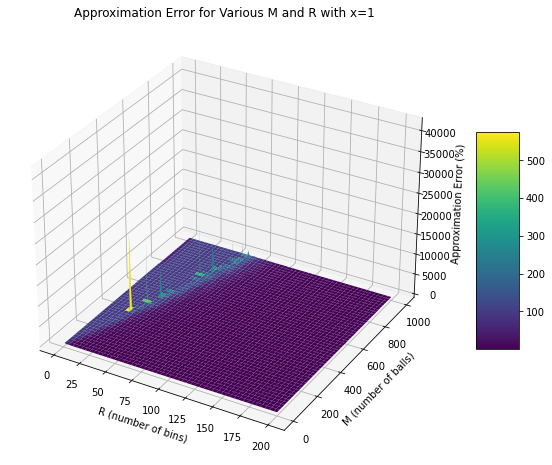

In [7]:
# 3D Plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R_mesh, M_mesh, error_mesh, cmap='viridis', edgecolor='none')
ax.set_xlabel('R (number of bins)')
ax.set_ylabel('M (number of balls)')
ax.set_zlabel('Approximation Error (%)')
ax.set_title('Approximation Error for Various M and R with x=1')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Color bar for error magnitude

# ax.set_zlim(0, 100)

plt.show()

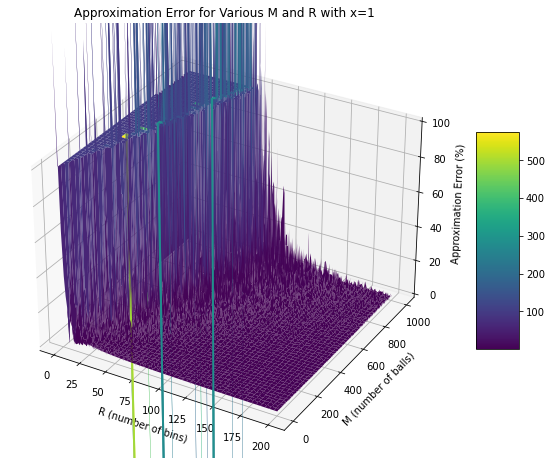

In [8]:
# 3D Plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R_mesh, M_mesh, error_mesh, cmap='viridis', edgecolor='none')
ax.set_xlabel('R (number of bins)')
ax.set_ylabel('M (number of balls)')
ax.set_zlabel('Approximation Error (%)')
ax.set_title('Approximation Error for Various M and R with x=1')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Color bar for error magnitude

ax.set_zlim(0, 100)

plt.show()

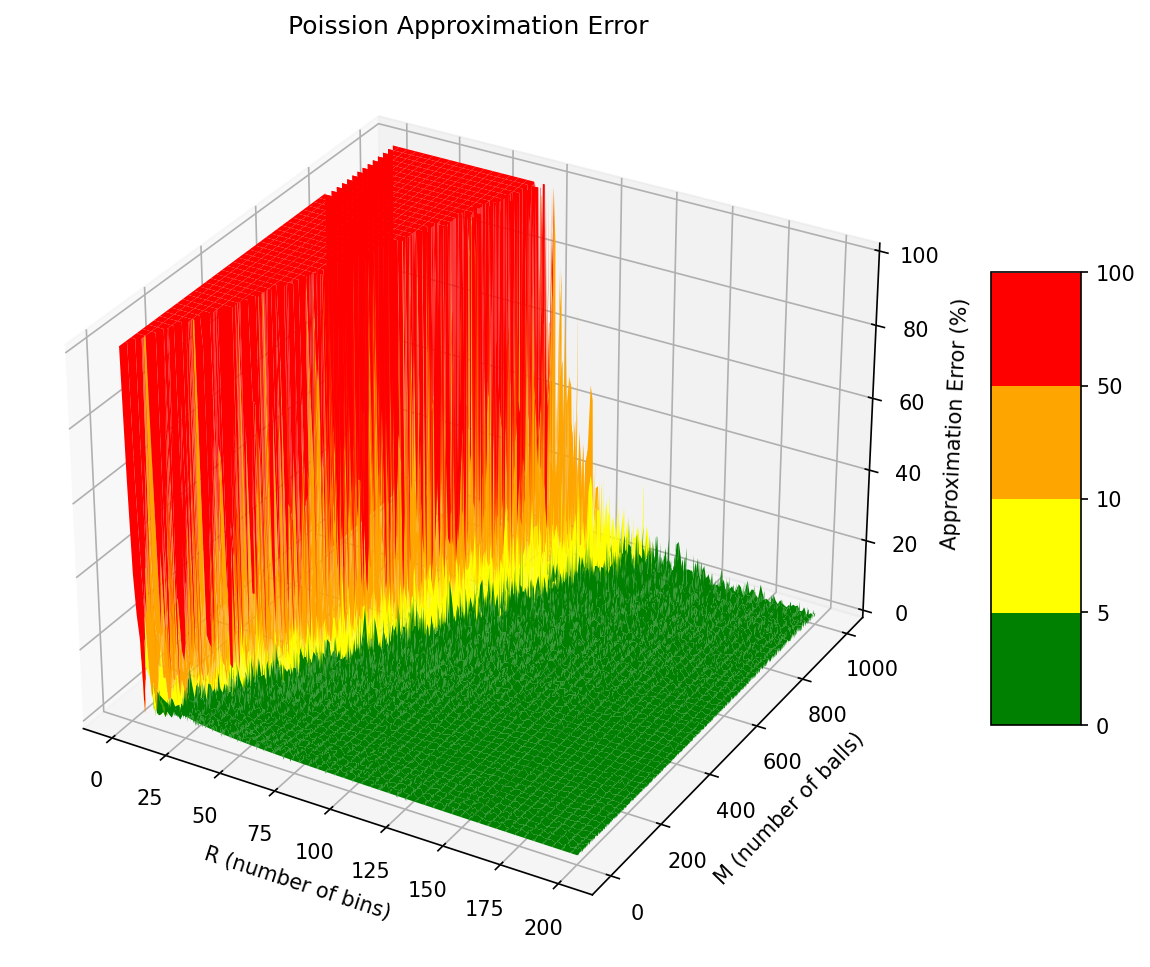

In [9]:
capped_error_mesh = np.copy(error_mesh)

capped_error_mesh[capped_error_mesh > 100] = 100

# Color Bar
colors = ['green', 'yellow', 'orange', 'red']
bounds = [0, 5, 10, 50, 100]  # Define boundaries for the colors
# bounds = [0, 1, 2, 5, 100]  # Define boundaries for the colors
custom_cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R_mesh, M_mesh, capped_error_mesh, cmap=custom_cmap, norm=norm, edgecolor='none')


ax.set_xlabel('R (number of bins)')
ax.set_ylabel('M (number of balls)')
ax.set_zlabel('Approximation Error (%)')
ax.set_title('Poission Approximation Error')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Color bar for error magnitude
# fig.colorbar(surf, boundaries=bounds, shrink=0.5, aspect=5)  # Add custom colorbar

ax.set_zlim(0, 100)

plt.show()

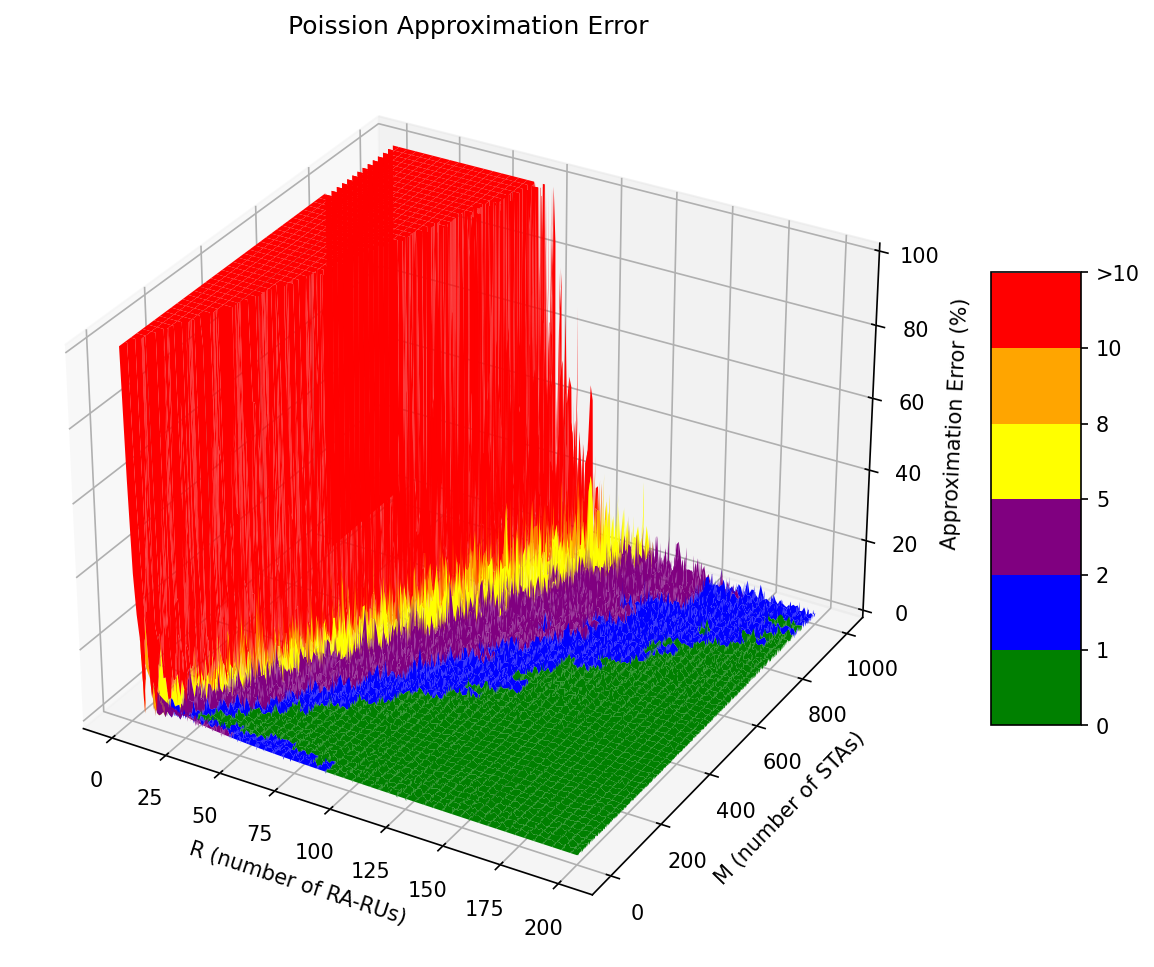

In [10]:
capped_error_mesh = np.copy(error_mesh)

capped_error_mesh[capped_error_mesh > 100] = 100

# Color Bar
# colors = ['green', 'yellow', 'orange', 'red']
colors = ['green', 'blue', 'purple', 'yellow', 'orange', 'red']
# bounds = [0, 5, 10, 50, 100]  # Define boundaries for the colors
bounds = [0, 1, 2, 5, 8, 10, 100]  # Define boundaries for the colors
custom_cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R_mesh, M_mesh, capped_error_mesh, cmap=custom_cmap, norm=norm, edgecolor='none')


ax.set_xlabel('R (number of RA-RUs)')
ax.set_ylabel('M (number of STAs)')
ax.set_zlabel('Approximation Error (%)')
ax.set_title('Poission Approximation Error')
# fig.colorbar(surf, shrink=0.5, aspect=5)  # Color bar for error magnitude
# fig.colorbar(surf, boundaries=bounds, shrink=0.5, aspect=5)  # Add custom colorbar

ax.set_zlim(0, 100)

# Create colorbar with custom ticks and labels
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_ticks([0, 1, 2, 5, 8, 10, 100])  # Set ticks to match your bounds
cbar.set_ticklabels(['0', '1', '2', '5', '8', '10', '>10'])  # Replace "100" with "10+" for display


plt.show()

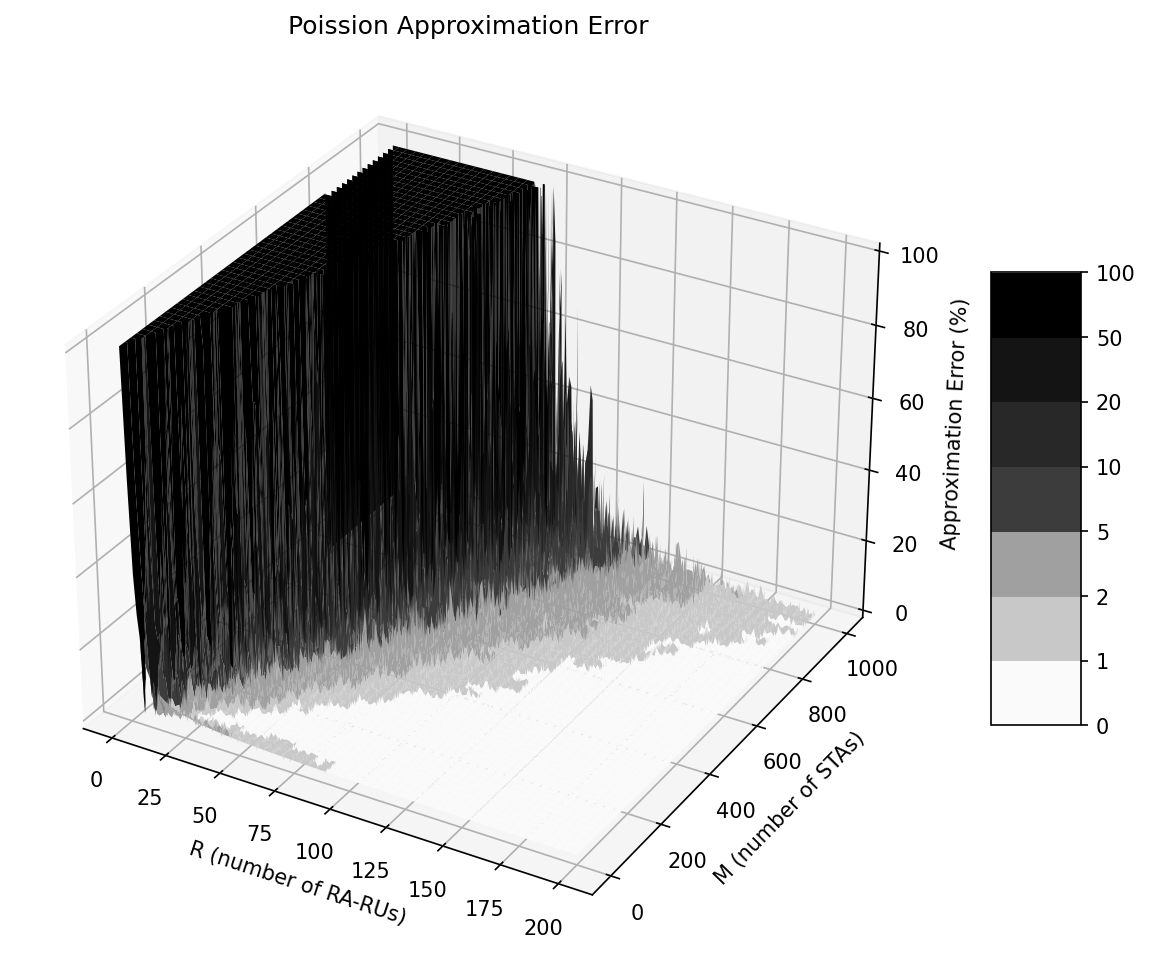

In [18]:
capped_error_mesh = np.copy(error_mesh)

capped_error_mesh[capped_error_mesh > 100] = 100

# Color Bar
# colors = ['green', 'yellow', 'orange', 'red']
colors = [
    '#FAFAFA',  # 0-1
    '#C8C8C8',  # 1-2
    '#A0A0A0',  # 2-5
    '#3C3C3C',  # 5-10
    '#282828',  # 10-20
    '#141414',  # 20-50
    '#000000',  # 50-100
]
# bounds = [0, 5, 10, 50, 100]  # Define boundaries for the colors
bounds = [0, 1, 2, 5, 10, 20, 50, 100] # Define boundaries for the colors
custom_cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R_mesh, M_mesh, capped_error_mesh, cmap=custom_cmap, norm=norm, edgecolor='none')


ax.set_xlabel('R (number of RA-RUs)')
ax.set_ylabel('M (number of STAs)')
ax.set_zlabel('Approximation Error (%)')
ax.set_title('Poission Approximation Error')
# fig.colorbar(surf, shrink=0.5, aspect=5)  # Color bar for error magnitude
# fig.colorbar(surf, boundaries=bounds, shrink=0.5, aspect=5)  # Add custom colorbar

ax.set_zlim(0, 100)

# Create colorbar with custom ticks and labels
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_ticks([0, 1, 2, 5, 10, 20, 50, 100])  # Set ticks to match your bounds
cbar.set_ticklabels(['0', '1', '2', '5', '10', '20', '50', '100'])  # Replace "100" with "10+" for display


plt.show()